In [1]:
import emcee
import corner
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#fidparam = np.array([0.8159,  0.2589,  0.0486,  0.6774,  0.9667, -1., 2., 1.])
#symbols = ['$\sigma_{8}$', '$\Omega_{c}$', '$\Omega_{b}$', '$h$', '$n_{s}$', '$w_{0}$', '$b_lbg$', '$b_int$']
fidparam = np.array([0.8159,  0.2589,  0.0486,  0.6774,  0.9667, -1.])
symbols = ['$\sigma_{8}$', '$\Omega_{c}$', '$\Omega_{b}$', '$h$', '$n_{s}$', '$w_{0}$']
nparams = len(fidparam)

In [3]:
filename = "mcmc_data.h5"
reader = emcee.backends.HDFBackend(filename)

In [4]:
samples = reader.get_chain(flat=False)
nwalkers = 100

In [5]:
chain = 20

debug_samples = samples
sig8 = debug_samples[:][:, chain][:, 0]
o_c = debug_samples[:][:, chain][:, 1]
o_m = debug_samples[:][:, chain][:, 2]
h = debug_samples[:][:, chain][:, 3]
n_s = debug_samples[:][:, chain][:, 4]
w_0 = debug_samples[:][:, chain][:, 5]
#b_lbg = debug_samples[:][:, chain][:, 6]
#b_int = debug_samples[:][:, chain][:, 7]

#params = [sig8, o_c, o_m, h, n_s, w_0, b_lbg, b_int]
params = [sig8, o_c, o_m, h, n_s, w_0]

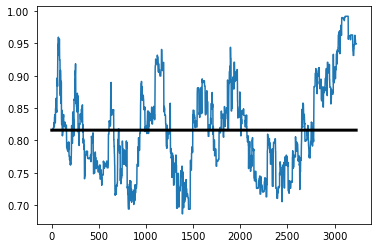

In [6]:
burn_in = 0
param_no = 0
chain = 0

plt.plot(debug_samples[burn_in:, chain][:, param_no])
plt.plot([fidparam[param_no]]*len(debug_samples[burn_in:, param_no]), color="k", lw=3)

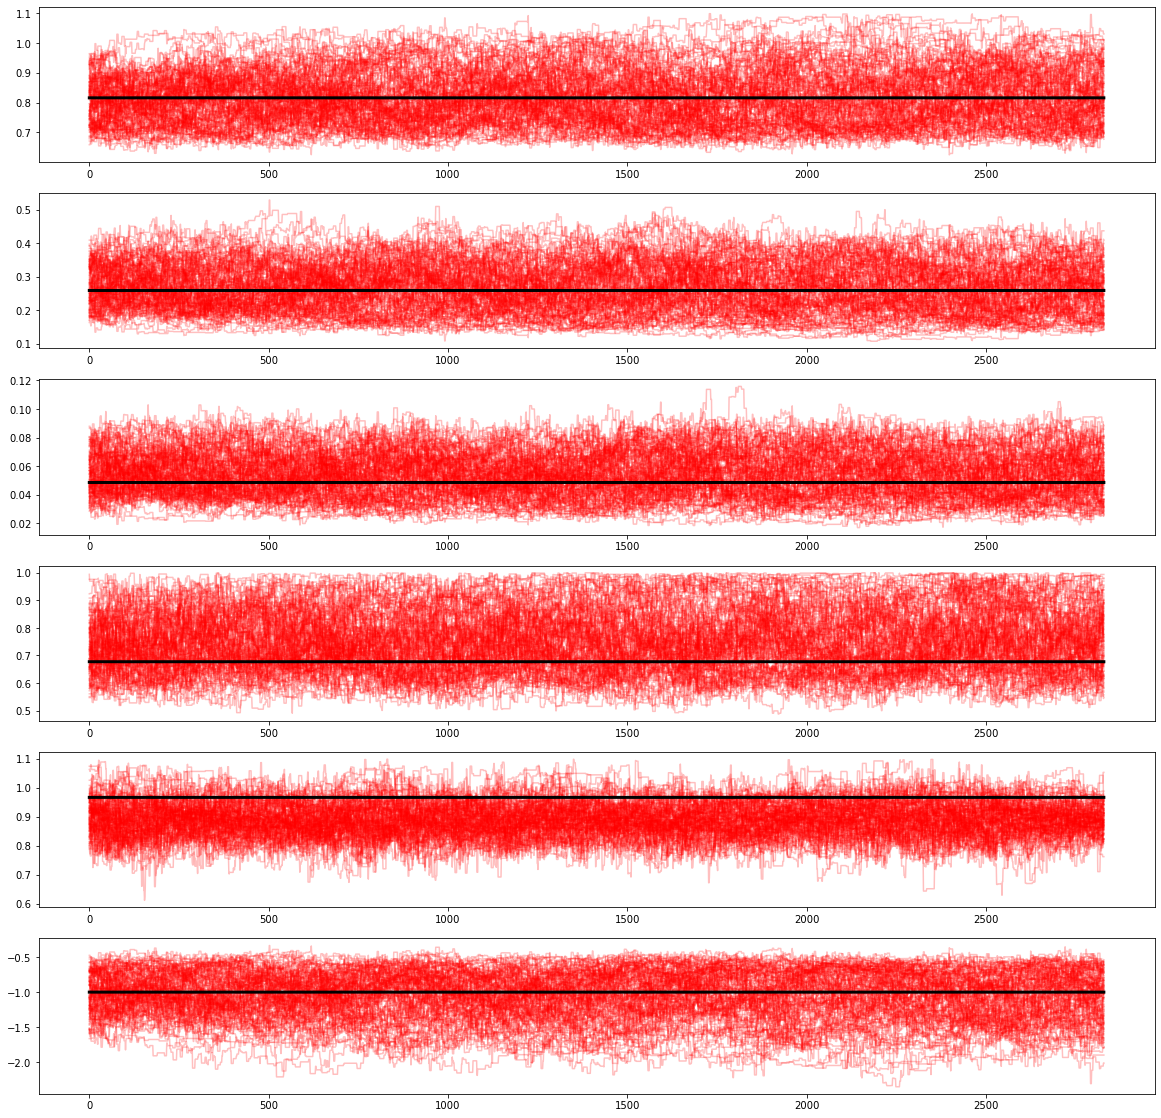

In [7]:
fig1, axes1 = plt.subplots(nparams, 1, figsize=(20,20), sharex=False, sharey=False)

burn_in = 400
line_len = len(samples[:, 0])-burn_in#len(sig8)
chain_len = nwalkers

param_len = len(params)

param_no = 0
while(param_no < param_len):
    chain = 0
    while(chain < chain_len):
        axes1[param_no].plot(samples[burn_in:, chain][:, param_no], alpha=0.25, color='red')
        chain+=1
    param_no+=1

    
axes1[0].plot([fidparam[0]]*line_len, color="k", lw=3)
axes1[1].plot([fidparam[1]]*line_len, color="k", lw=3)
axes1[2].plot([fidparam[2]]*line_len, color="k", lw=3)
axes1[3].plot([fidparam[3]]*line_len, color="k", lw=3)
axes1[4].plot([fidparam[4]]*line_len, color="k", lw=3)
axes1[5].plot([fidparam[5]]*line_len, color="k", lw=3)
#axes1[6].plot([fidparam[6]]*line_len, color="k", lw=3)
#axes1[7].plot([fidparam[7]]*line_len, color="k", lw=3)

(array([4.000e+00, 2.900e+01, 4.600e+01, 1.180e+02, 2.420e+02, 4.070e+02,
        7.150e+02, 1.026e+03, 1.429e+03, 1.764e+03, 2.498e+03, 3.252e+03,
        3.422e+03, 3.632e+03, 4.492e+03, 4.610e+03, 4.667e+03, 4.876e+03,
        4.971e+03, 5.552e+03, 5.110e+03, 5.253e+03, 5.188e+03, 5.171e+03,
        5.146e+03, 5.095e+03, 5.067e+03, 4.815e+03, 4.832e+03, 4.743e+03,
        4.958e+03, 5.153e+03, 4.873e+03, 5.139e+03, 4.985e+03, 4.779e+03,
        5.170e+03, 4.879e+03, 4.714e+03, 4.942e+03, 4.654e+03, 4.622e+03,
        4.235e+03, 4.354e+03, 4.776e+03, 4.907e+03, 4.583e+03, 4.363e+03,
        4.360e+03, 4.499e+03, 4.250e+03, 4.226e+03, 3.960e+03, 3.974e+03,
        3.848e+03, 3.684e+03, 3.637e+03, 3.307e+03, 3.598e+03, 3.458e+03,
        2.931e+03, 2.906e+03, 3.042e+03, 2.454e+03, 2.617e+03, 2.744e+03,
        2.727e+03, 2.669e+03, 2.340e+03, 2.284e+03, 2.119e+03, 2.040e+03,
        1.944e+03, 1.708e+03, 1.625e+03, 1.376e+03, 1.403e+03, 1.457e+03,
        1.185e+03, 1.204e+03, 1.185e+0

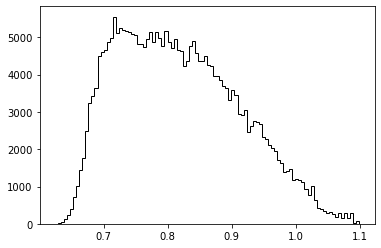

In [8]:
samples = reader.get_chain(flat=True)
plt.hist(samples[nwalkers*burn_in:, 0], 100, color="k", histtype="step")

In [9]:
samples[200*150:, :].shape

(293000, 6)

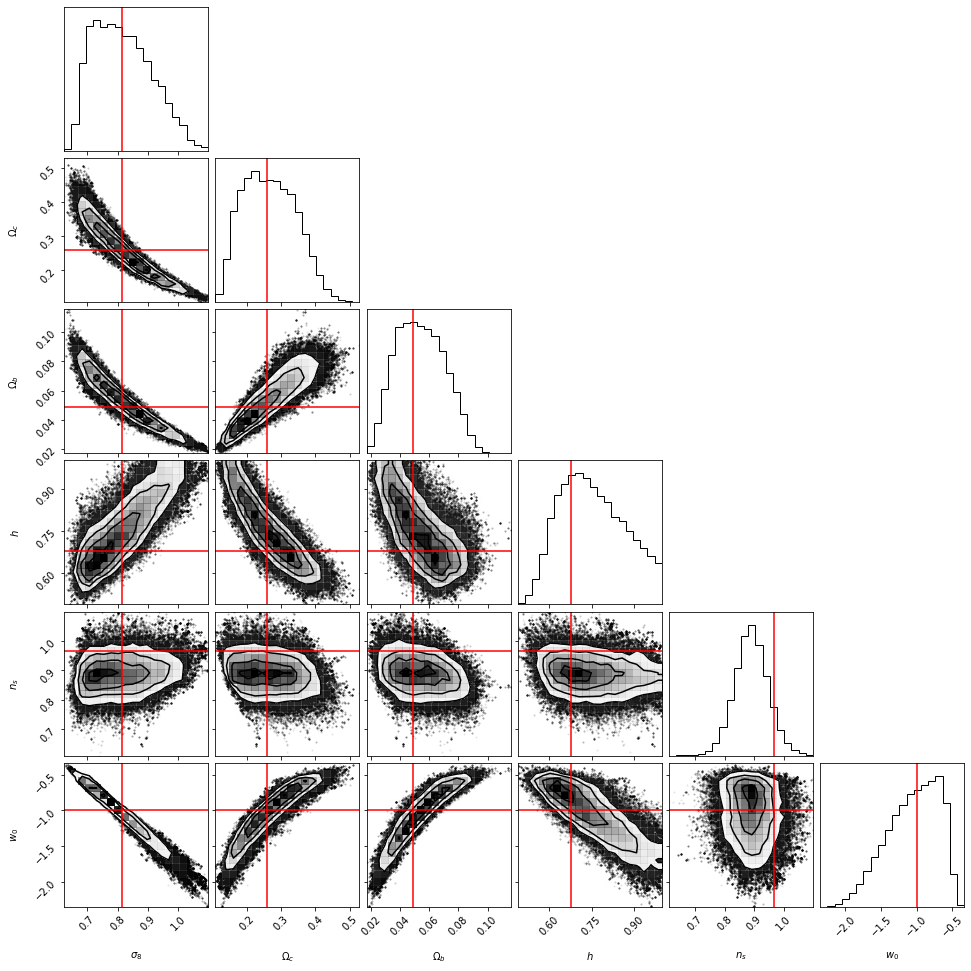

In [10]:
figure = corner.corner(samples[nwalkers*burn_in:, :], labels=symbols)

# Extract the axes
axes = np.array(figure.axes).reshape(nparams, nparams)

# Loop over the diagonal
for i in range(nparams):
    ax = axes[i, i]
    ax.axvline(fidparam[i], color="r")

# Loop over the histograms
for yi in range(nparams):
    for xi in range(yi):
        ax = axes[yi, xi]
        ax.axvline(fidparam[xi], color="r")
        ax.axhline(fidparam[yi], color="r")
        ax.plot(fidparam[xi], fidparam[yi], "r")